In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


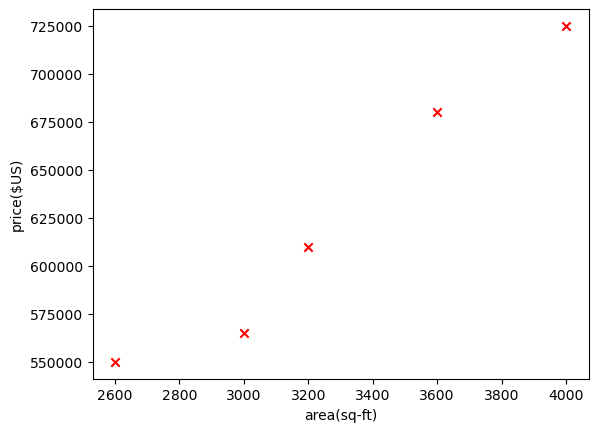

In [9]:
%matplotlib inline
plt.xlabel("area(sq-ft)")
plt.ylabel("price($US)")
plt.scatter(df.area, df.price, color="red", marker="x")

In [10]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [11]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [12]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(new_df,price)

LinearRegression()

In [13]:
linear_reg.predict([[5000]])

d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [14]:
linear_reg.coef_

array([135.78767123])

In [15]:
linear_reg.intercept_

180616.43835616432

In [16]:
linear_reg.predict([[4000]])

d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([723767.12328767])

In [17]:
import pickle

In [18]:
with open('model_pickle','wb') as f:
    pickle.dump(linear_reg,f)

In [20]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [24]:
new_input=pd.read_csv('areas.csv')
new_input

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [25]:
mp.predict(new_input)


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

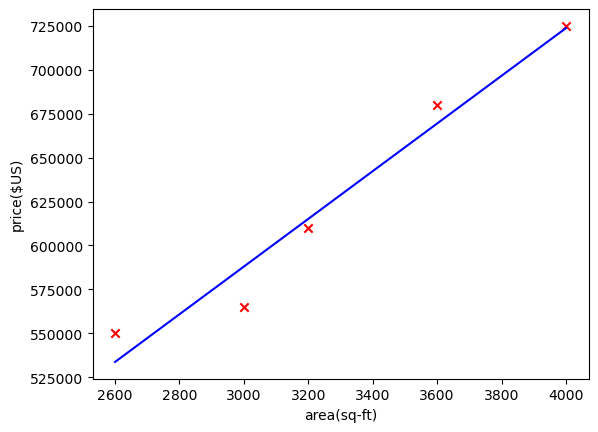

In [26]:
%matplotlib inline
plt.xlabel("area(sq-ft)")
plt.ylabel("price($US)")
plt.scatter(df.area, df.price, color="red", marker="x")
plt.plot(df.area, linear_reg.predict(df[['area']]), color="blue")

In [29]:
import joblib
joblib.dump(linear_reg,'model_joblib')

['model_joblib']

In [31]:
mj=joblib.load('model_joblib')

In [34]:
mj.predict([[5000]])

d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])